The following example shows how to train a model. Get a list of training data csv file in the selected folder. Lessons learned so far:
- Training result is very sensitive to normalization. The normalization approach based on mean and variance does not work very well. Still need to manually set mean and variance.
- t-sne plot of adapter trace is an important flag of training result. 
- h net does not have to descent because phi net training strives to make it rise, while h net training itself tries to lower the loss
- Increase the h training frequency to fight against rising h 
- Increase alpha to push domain info to adapter
- Increase number of features to minimize MSE loss.
- ocassional small spike in cross entropy loss is possibly a sign that phi net become further domain invariant and may not be bad.
- at the late stage of training while both mse loss and cross entropy loss converge. May need to train h net every step to refine the optimization direction.
- Do not need to select the model at the end epoch. Select the epoch when the loss is reasonably low and stable. 
- RMS is a good indicator because it matches the least square form of loss function
- When the residual force is small, e.g. training disturbance force compensated by BEMT, disturbance normalization should scale up the label for better learning. 

Existing problem:
- The more classes, the harder to train. The difficulty comes from instability of loss_f and loss_c. alpha is hard to tune.
- t-sne gets worse as epoch grows and the cross entropy loss remains the same. 

In [1]:
import os
import matplotlib.pyplot as plt

import training_manager

current_dir = os.getcwd()
# training_subfolder = "wind_near_wall_wo_bemt_in_control_train_xz_wind"
training_subfolder = "wind_near_wall_wo_bemt_in_control_far_from_wall"  # training in no wall condition
# training_subfolder = "nf_training_back2back"
# validation_subfolder = "nf_validation_back2back"
validation_subfolder = "wind_near_wall_validation_no_bemt"
# validation_subfolder = "wind_near_wall_validation_no_bemt_sinusoidal"

def generate_data_list(subfolder):
    """
    Generate a list of data files in the specified subfolder.
    """
    folder_path = os.path.join(os.path.dirname(current_dir), "data", "training", subfolder)
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Filter out files that do not end with .csv
    file_names = [f for f in file_names if f.endswith('.csv')]
    # add subfolder to the file names
    data_list = [os.path.join(subfolder, f) for f in file_names]
    return data_list

data_list = generate_data_list(training_subfolder)
print("Training Data List:")
for data in data_list:
    print(data)

validation_list = generate_data_list(validation_subfolder)
print("\nValidation Data List:")
for data in validation_list:
    print(data)

path1 = os.path.join(training_subfolder, "input_label_map_disturbance_force_label.yaml")

Training Data List:
wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0_0_z0_0_d100_4_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0_0_z3_0_d100_4_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0_0_z5_0_d100_4_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0_0_zn3_0_d100_4_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0_0_zn5_0_d100_4_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_xn1_0_y0_0_z0_0_d100_4_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_xn1_0_y0_0_z3_0_d100_4_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_xn1_0_y0_0_z5_0_d100_4_train_no_bemt.csv
wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_xn1_0_y0_0_zn3_0_d100_4_train_no_bemt.csv
w

- Make sure the input_label_map_disturbance_force_label.yaml is in the selected folder. This yaml defines which fields are model inputs and which fields are data labels. 
- Make sure the column_map.yaml is in the selected folder. This yaml maps data fields to the corresponding column in the csv files. This file can be auto-generated by `Simulation\simulation\training_data_user_guide.ipynb`
- If this is the first time to train on this data. The script will normalize the data and save the normalization parameters into a file.

Setting up data factory...
Loading normalization params file from
..\data\training\wind_near_wall_wo_bemt_in_control_far_from_wall\normalization_params.yaml
Using 6001 samples from the dataset for training from source file: wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0_0_z0_0_d100_4_train_no_bemt.csv
Using 6001 samples from the dataset for training from source file: wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0_0_z3_0_d100_4_train_no_bemt.csv
Using 6001 samples from the dataset for training from source file: wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0_0_z5_0_d100_4_train_no_bemt.csv
Using 6001 samples from the dataset for training from source file: wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0_0_zn3_0_d100_4_train_no_bemt.csv
Using 6001 samples from the dataset for training from source file: wind_near_wall_wo_bemt_in_control_far_from_wall\test_wind_near_wall_x0_0_y0

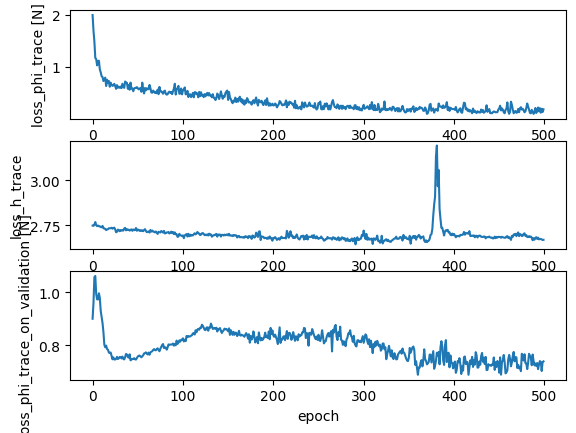

In [2]:
# use the data from previous section to train the model

factory = training_manager.PipelineFactory(True)
manager = factory.make_training_pipeline()
manager.set_up(
    training_data_menu=data_list,
    # training_data_menu=data_list[:4],    # use small data list for quick testing
    validation_data_menu=validation_list[-1:],
    input_label_map_file=path1,
    can_inspect_data=False
)
plt.show() 
manager.train()

plt.show()  

Inspect data in the data list.

Plotting t-SNE of a_trace...


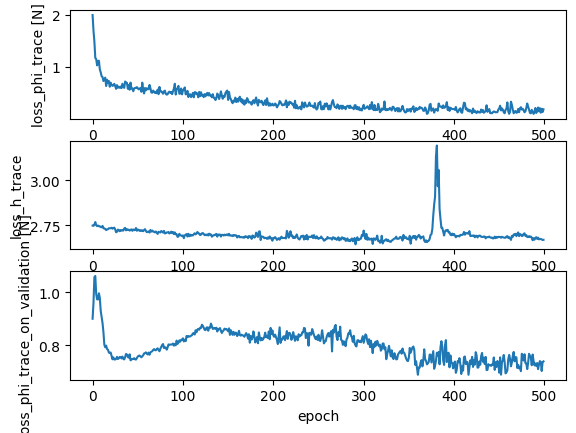

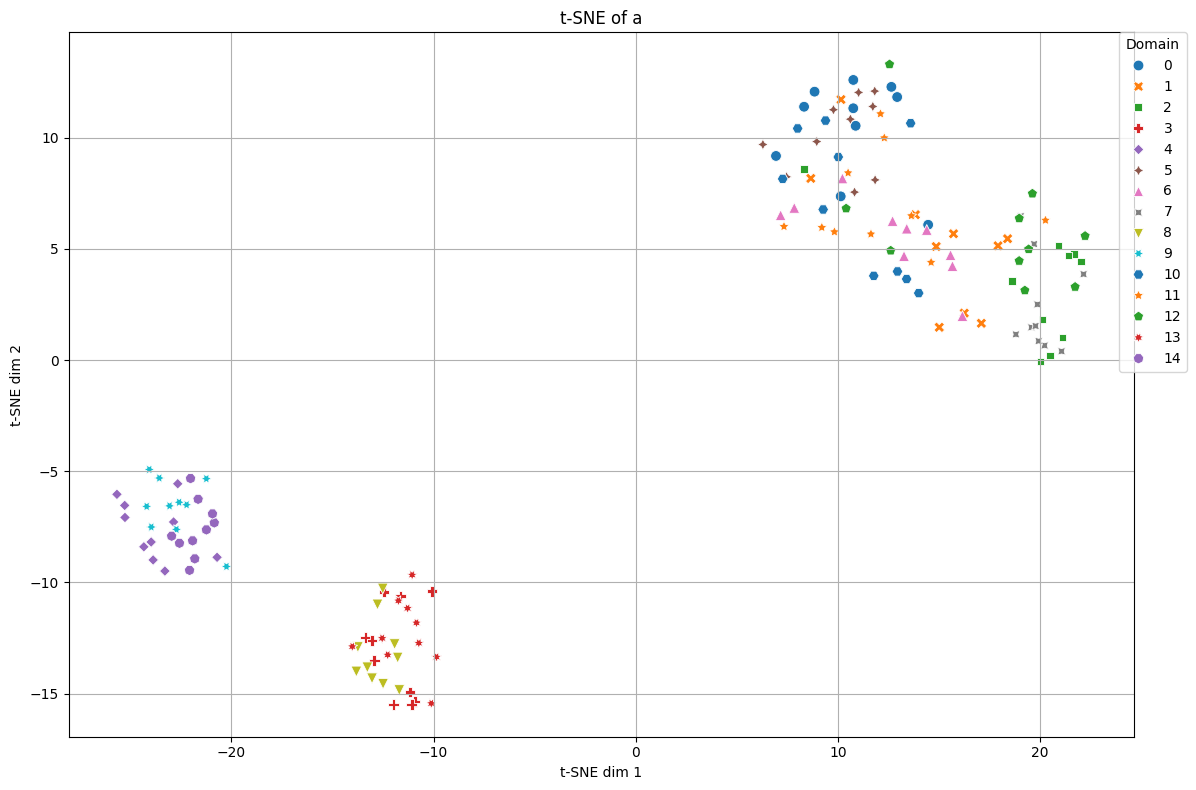

In [3]:
# trainer_instance.inspect_data(data_list[:2])
manager.show_result_only()

After training, we can save the model in the following way.

In [4]:
model_name = training_subfolder
manager.save_model(model_name)

Model saved to model\wind_near_wall_wo_bemt_in_control_far_from_wall.pth


Test the model using the test set.

test Data List:
wind_near_wall_validation_no_bemt\test_wind_near_wall_x0_0_y0_0_z10_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_x0_0_y0_0_z1_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_x0_0_y0_0_z4_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_x0_0_y0_0_zn10_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_x0_0_y0_0_zn1_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_x0_0_y0_0_zn4_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn2_0_y0_0_z10_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn2_0_y0_0_z1_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn2_0_y0_0_z4_0_d0_5_validation_no_bemt.csv
wind_near_wall_validation_no_bemt\test_wind_near_wall_xn2_0_y0_0_zn10_0_d0_5_validation_no_bemt.csv
wi

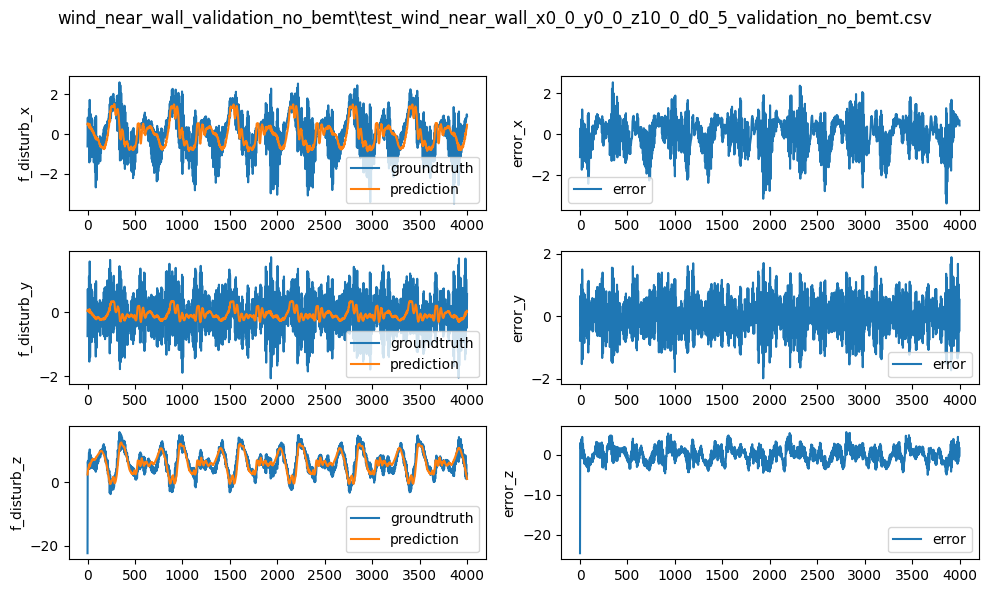

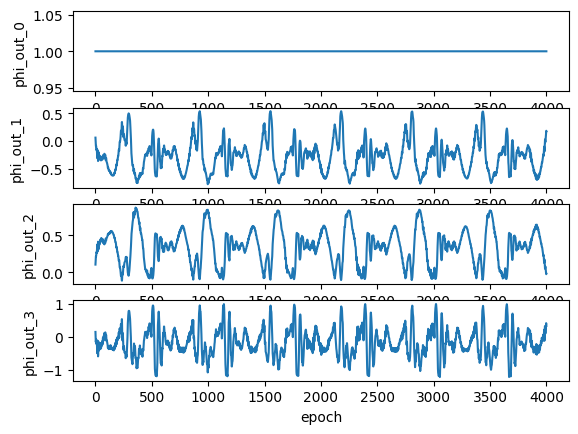

phi_out: tensor([[ 1.0000,  0.0600,  0.1040,  0.1526],
        [ 1.0000,  0.0170,  0.1290,  0.0487],
        [ 1.0000, -0.0391,  0.1645, -0.0818],
        ...,
        [ 1.0000,  0.3426, -0.0772,  0.2970],
        [ 1.0000,  0.3343, -0.0695,  0.2557],
        [ 1.0000,  0.3205, -0.0599,  0.1938]])
a = tensor([[ 0.0736,  0.0255, -2.4424],
        [ 2.2373,  1.3571,  7.3920],
        [ 0.1876, -0.2418, 15.7560],
        [-2.3226, -1.6650, -1.6578]])


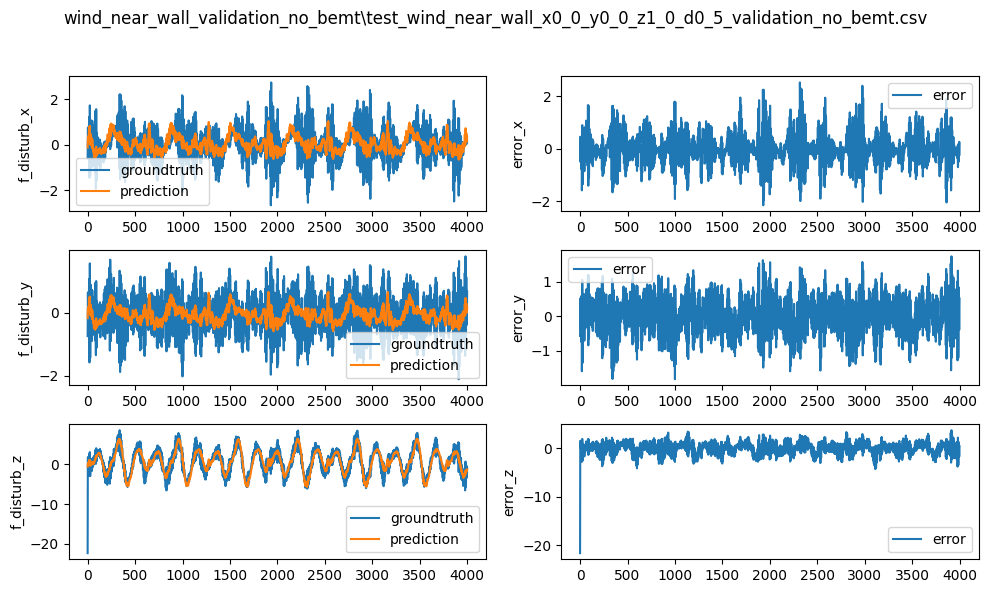

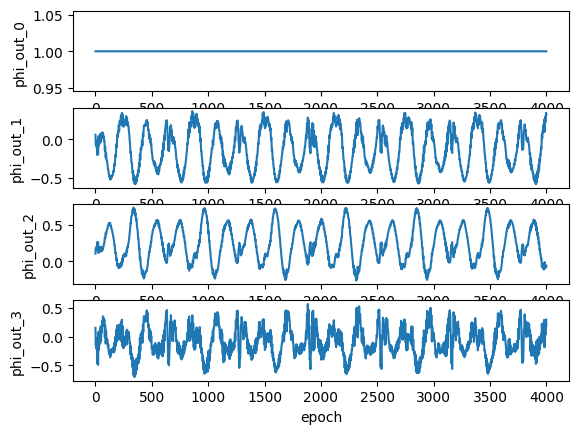

phi_out: tensor([[ 1.0000,  0.0615,  0.1037,  0.1566],
        [ 1.0000,  0.0168,  0.1306,  0.0536],
        [ 1.0000, -0.0435,  0.1697, -0.0823],
        ...,
        [ 1.0000,  0.3345, -0.0968,  0.2929],
        [ 1.0000,  0.3245, -0.0877,  0.2456],
        [ 1.0000,  0.3060, -0.0747,  0.1708]])
a = tensor([[ 8.7538e-02,  9.9854e-03, -1.3467e+00],
        [ 2.2895e+00,  1.3199e+00,  7.0605e+00],
        [ 7.1154e-01,  1.9674e-01,  1.9616e+01],
        [-1.5446e+00, -1.0049e+00,  1.5293e+00]])


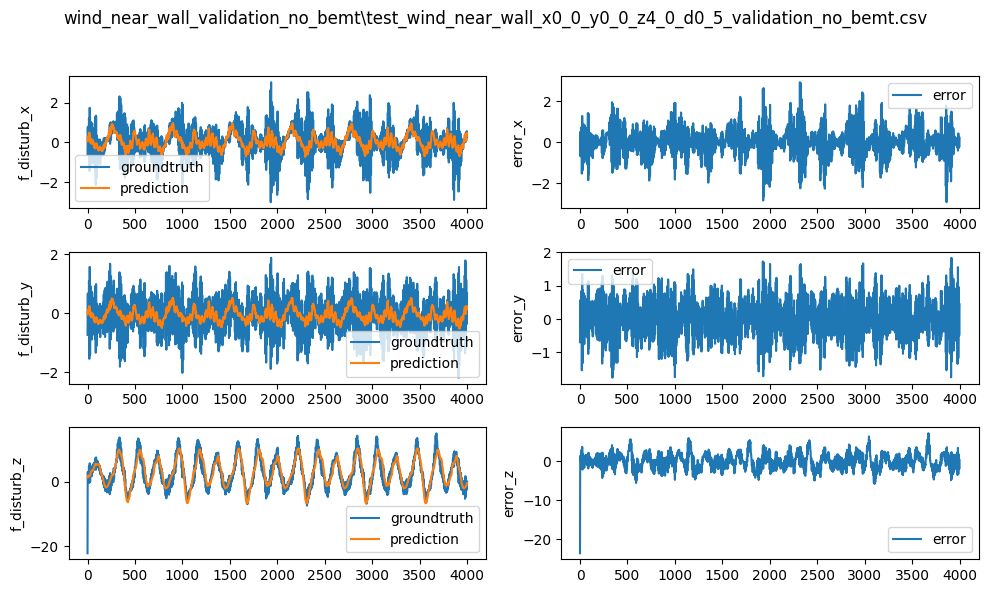

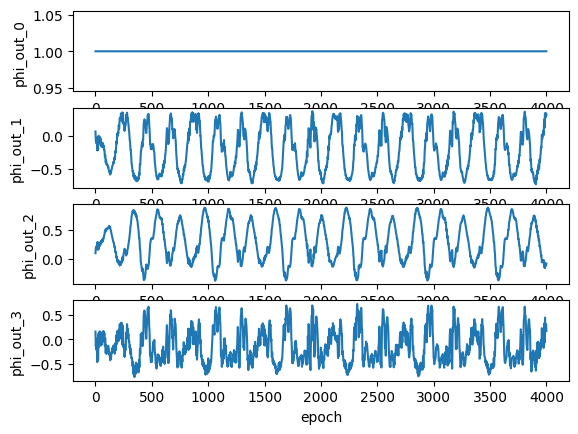

phi_out: tensor([[ 1.0000,  0.0598,  0.1068,  0.1528],
        [ 1.0000,  0.0065,  0.1423,  0.0460],
        [ 1.0000, -0.0601,  0.1889, -0.0870],
        ...,
        [ 1.0000,  0.2047, -0.0350,  0.1617],
        [ 1.0000,  0.1824, -0.0172,  0.0894],
        [ 1.0000,  0.1488,  0.0054, -0.0107]])
a = tensor([[ 5.2478e-02,  1.2387e-01,  3.8616e+00],
        [ 1.3016e+00,  6.8161e-01, -1.5638e+00],
        [-8.7068e-04, -9.2954e-01,  9.2906e-01],
        [-1.6343e+00, -1.7554e+00, -2.0162e+00]])


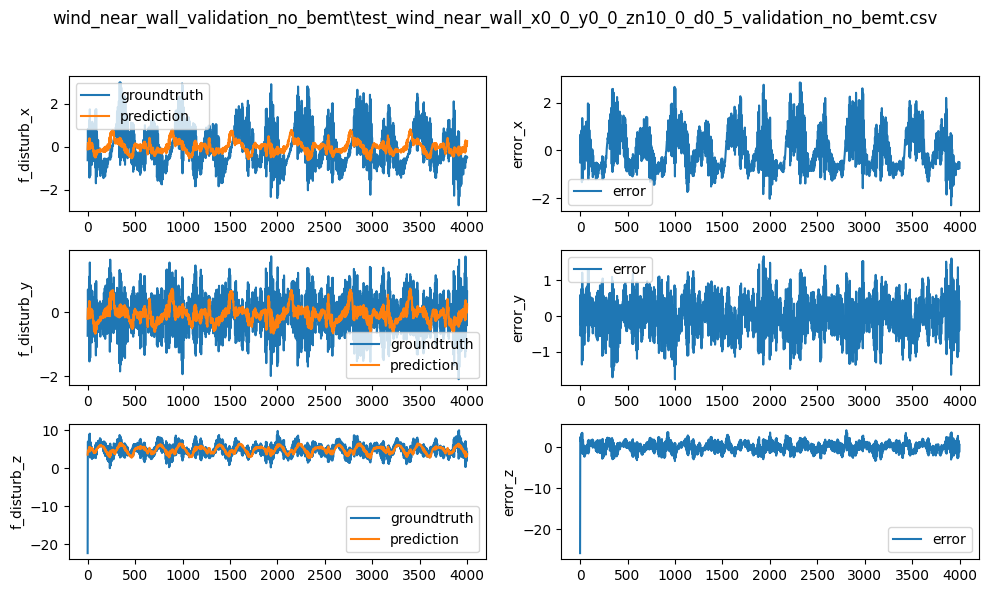

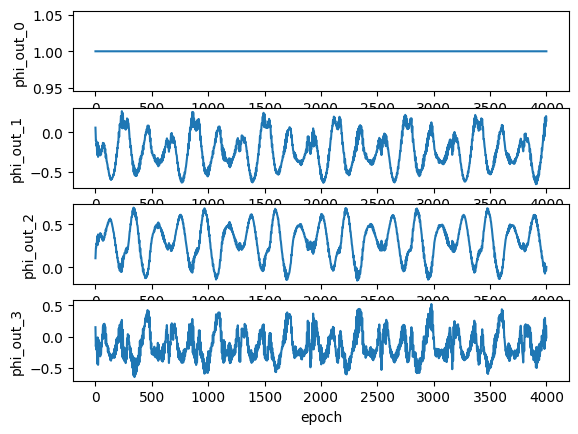

phi_out: tensor([[ 1.0000,  0.0597,  0.1036,  0.1523],
        [ 1.0000,  0.0202,  0.1252,  0.0511],
        [ 1.0000, -0.0340,  0.1585, -0.0807],
        ...,
        [ 1.0000,  0.3121, -0.0564,  0.2326],
        [ 1.0000,  0.3029, -0.0478,  0.1942],
        [ 1.0000,  0.2789, -0.0319,  0.1147]])
a = tensor([[ 0.0590,  0.0267, -2.7760],
        [ 2.1155,  1.3035,  7.2952],
        [ 0.0699, -0.3470, 13.7354],
        [-2.3174, -1.7072, -1.9965]])


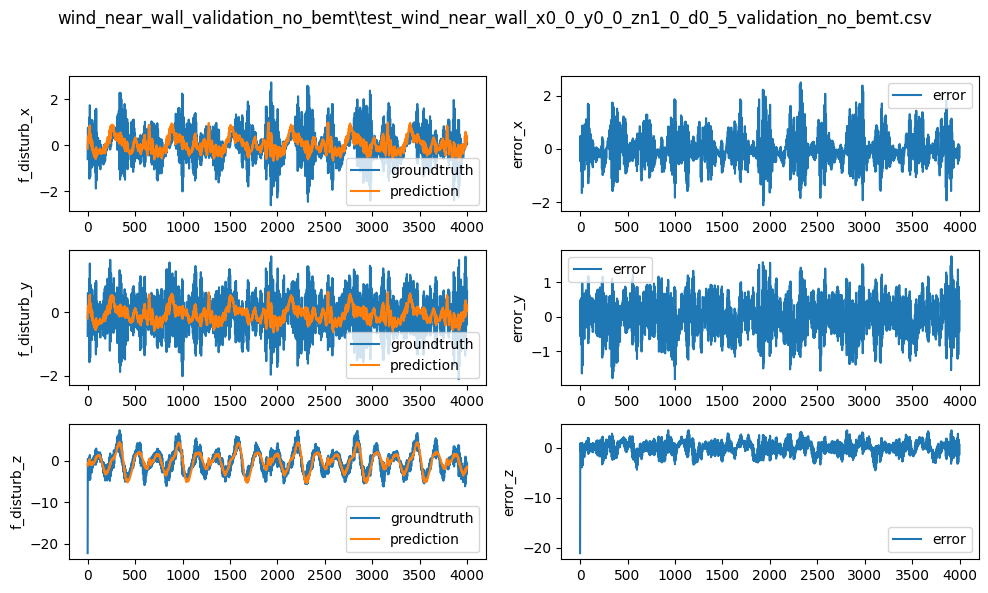

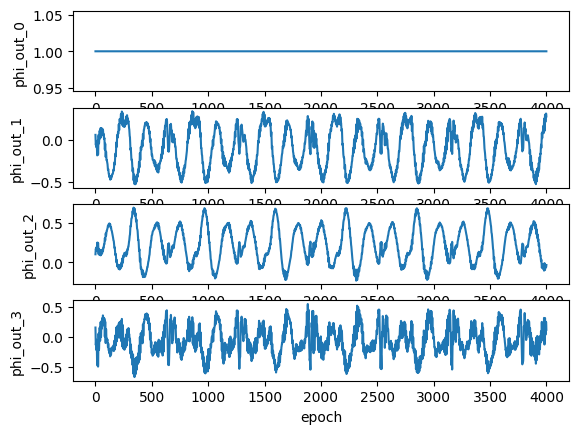

phi_out: tensor([[ 1.0000,  0.0614,  0.1029,  0.1562],
        [ 1.0000,  0.0170,  0.1281,  0.0462],
        [ 1.0000, -0.0380,  0.1624, -0.0843],
        ...,
        [ 1.0000,  0.2817, -0.0482,  0.1828],
        [ 1.0000,  0.2670, -0.0359,  0.1356],
        [ 1.0000,  0.2406, -0.0180,  0.0551]])
a = tensor([[ 0.0727,  0.0605, -1.2937],
        [ 1.9438,  1.0327,  3.6517],
        [-0.1531, -0.6402,  6.5877],
        [-2.4218, -1.7981, -2.6176]])


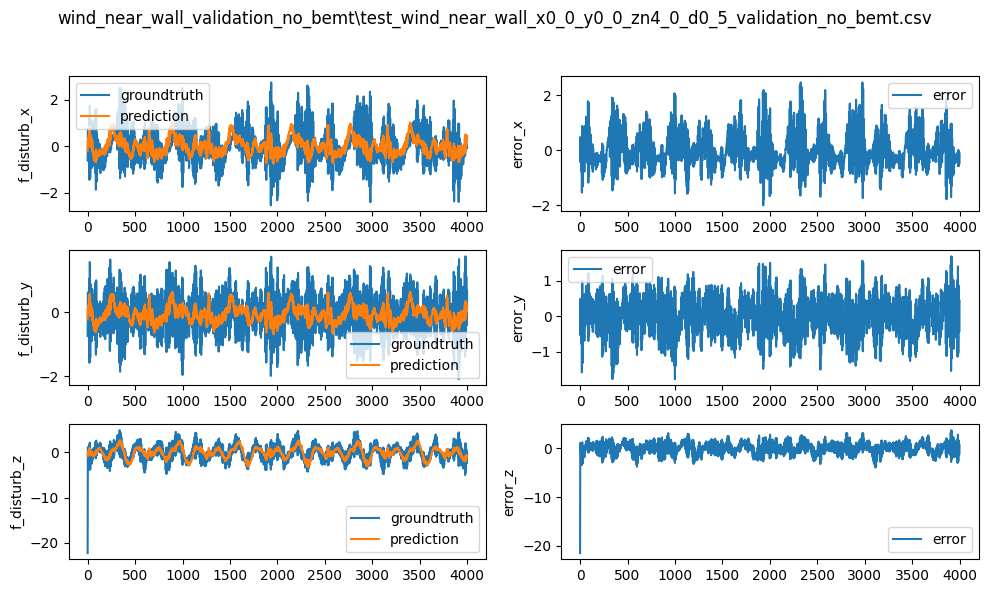

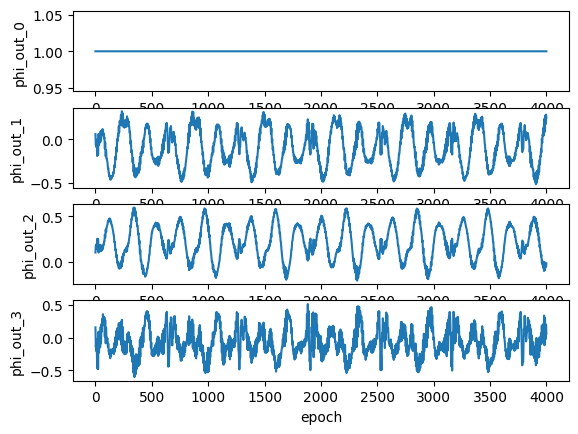

phi_out: tensor([[ 1.0000,  0.0612,  0.1054,  0.1557],
        [ 1.0000,  0.0044,  0.1401,  0.0314],
        [ 1.0000, -0.0642,  0.1853, -0.1156],
        ...,
        [ 1.0000,  0.1036,  0.0260,  0.2723],
        [ 1.0000,  0.1011,  0.0267,  0.2286],
        [ 1.0000,  0.0904,  0.0325,  0.1659]])
a = tensor([[-0.1918,  0.0489,  1.1156],
        [ 3.3277,  0.8029, -6.6623],
        [ 1.5483,  0.0752, 10.7733],
        [-1.3522, -0.4874,  4.0161]])


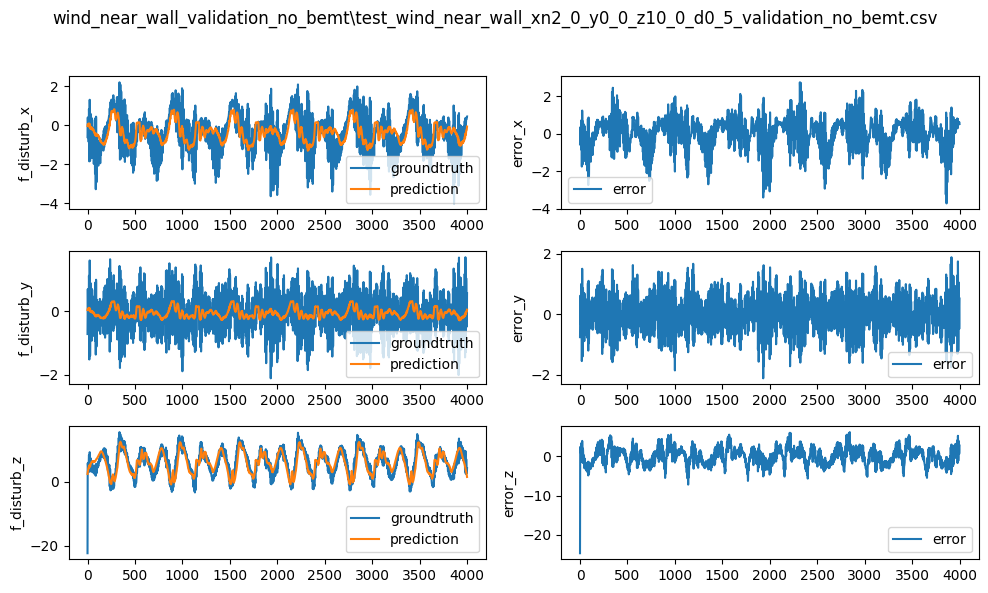

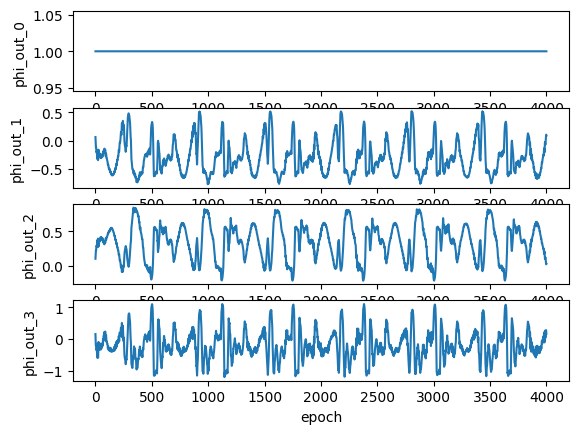

phi_out: tensor([[ 1.0000,  0.0611,  0.1036,  0.1556],
        [ 1.0000,  0.0122,  0.1307,  0.0346],
        [ 1.0000, -0.0451,  0.1663, -0.1003],
        ...,
        [ 1.0000,  0.2879, -0.0491,  0.1749],
        [ 1.0000,  0.2758, -0.0389,  0.1306],
        [ 1.0000,  0.2541, -0.0252,  0.0588]])
a = tensor([[-1.3594e-01,  1.0078e-02, -2.2674e+00],
        [ 2.2531e+00,  1.2958e+00,  6.7955e+00],
        [-8.9148e-02, -2.5944e-01,  1.5391e+01],
        [-2.4251e+00, -1.6368e+00, -1.3195e+00]])


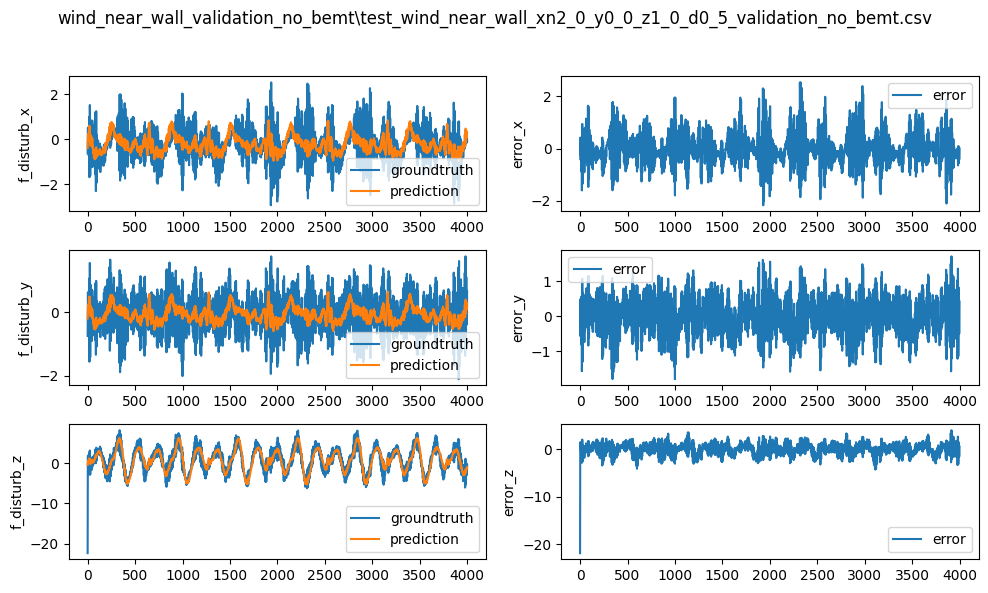

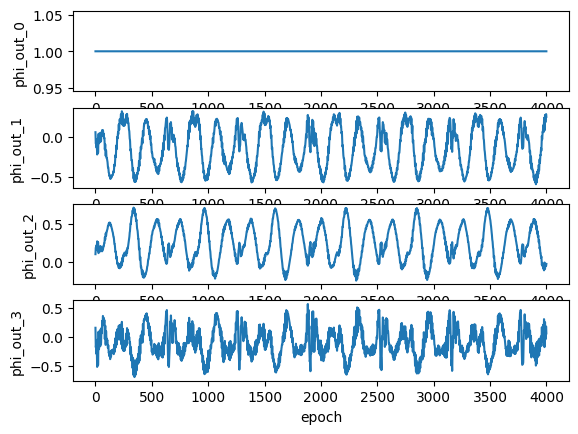

phi_out: tensor([[ 1.0000,  0.0612,  0.1045,  0.1556],
        [ 1.0000,  0.0103,  0.1352,  0.0404],
        [ 1.0000, -0.0547,  0.1774, -0.1036],
        ...,
        [ 1.0000,  0.2431, -0.0485,  0.0803],
        [ 1.0000,  0.2461, -0.0477,  0.0665],
        [ 1.0000,  0.2402, -0.0438,  0.0245]])
a = tensor([[-1.0627e-01,  6.7686e-03, -1.3417e+00],
        [ 2.1473e+00,  1.3587e+00,  7.2114e+00],
        [ 1.8749e-01,  1.4614e-01,  1.9604e+01],
        [-1.8445e+00, -1.1325e+00,  1.3813e+00]])


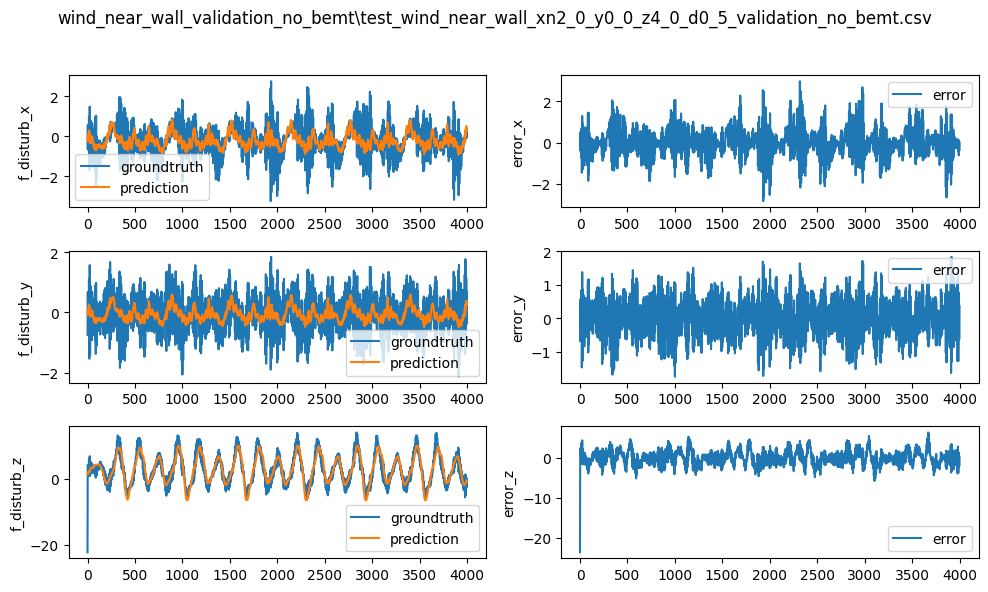

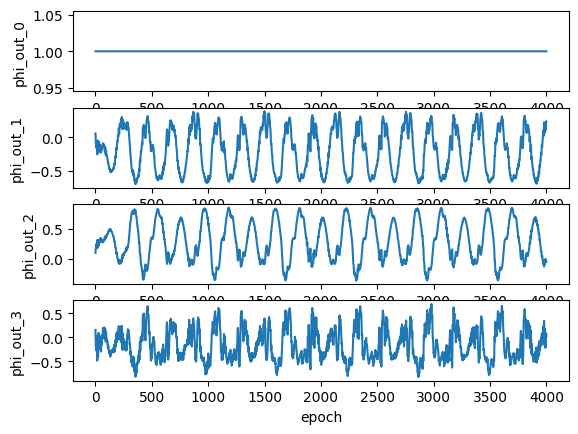

phi_out: tensor([[ 1.0000e+00,  6.0863e-02,  1.0615e-01,  1.5493e-01],
        [ 1.0000e+00, -2.4451e-04,  1.4352e-01,  2.2336e-02],
        [ 1.0000e+00, -7.5210e-02,  1.9364e-01, -1.3528e-01],
        ...,
        [ 1.0000e+00,  1.9393e-01, -2.9428e-02,  1.2833e-01],
        [ 1.0000e+00,  1.7101e-01, -1.1596e-02,  5.4969e-02],
        [ 1.0000e+00,  1.3767e-01,  1.2698e-02, -4.2928e-02]])
a = tensor([[-0.4148,  0.1086,  3.7393],
        [ 1.0911,  0.6324, -2.1045],
        [-0.1945, -1.0072,  1.2961],
        [-1.4017, -1.7874, -1.0622]])


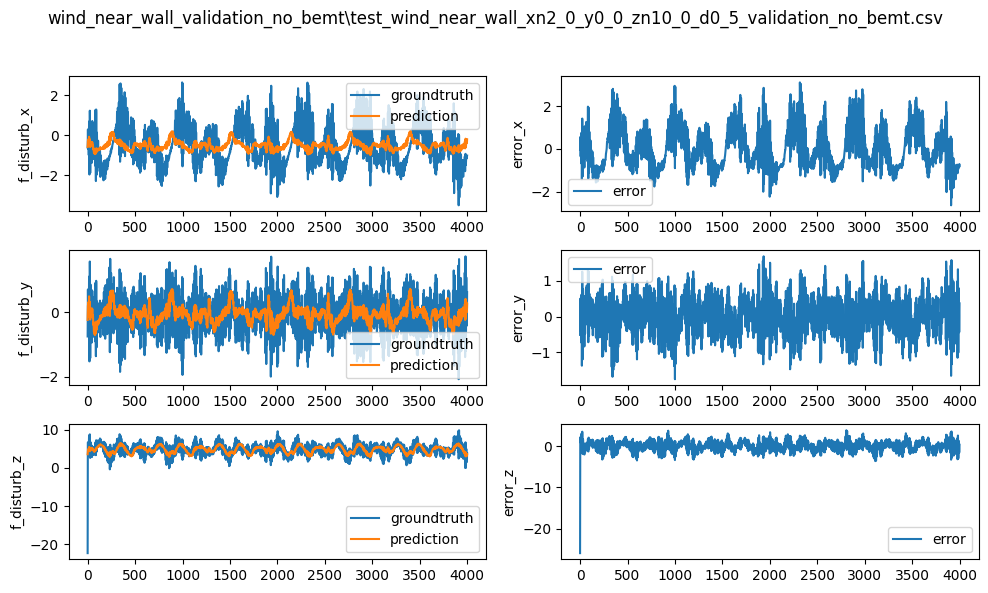

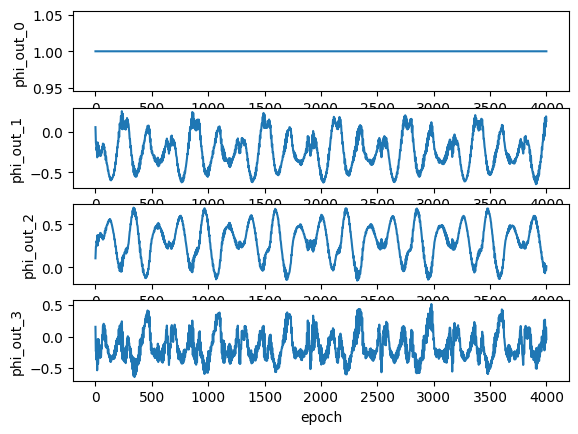

phi_out: tensor([[ 1.0000,  0.0588,  0.1044,  0.1497],
        [ 1.0000,  0.0163,  0.1265,  0.0389],
        [ 1.0000, -0.0442,  0.1633, -0.1085],
        ...,
        [ 1.0000,  0.3032, -0.0543,  0.2095],
        [ 1.0000,  0.2907, -0.0444,  0.1634],
        [ 1.0000,  0.2611, -0.0238,  0.0762]])
a = tensor([[-1.7949e-01,  1.0309e-02, -2.7386e+00],
        [ 2.1384e+00,  1.2539e+00,  6.6048e+00],
        [-1.3475e-01, -3.6164e-01,  1.3668e+01],
        [-2.4164e+00, -1.7002e+00, -1.5599e+00]])


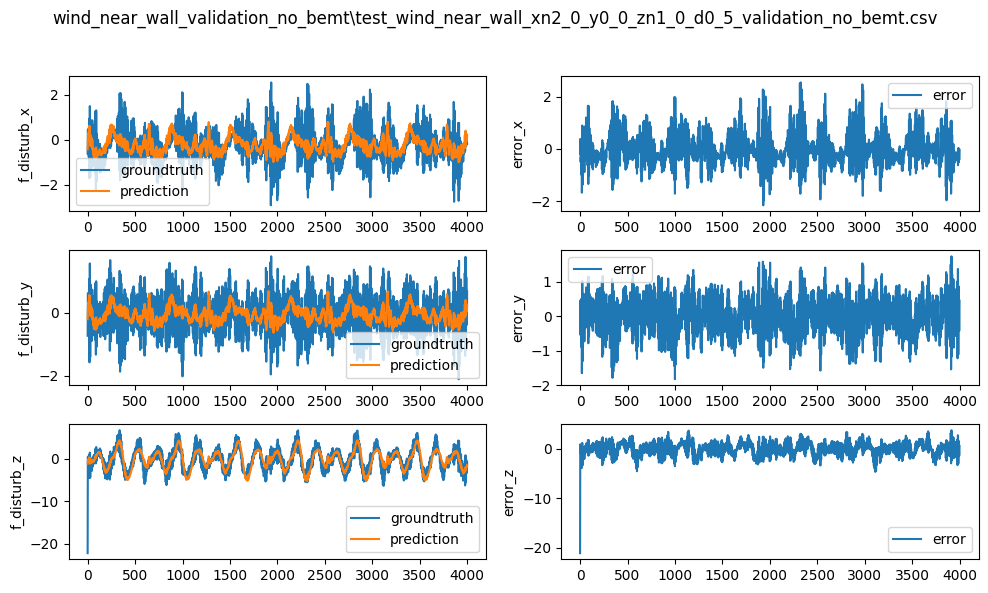

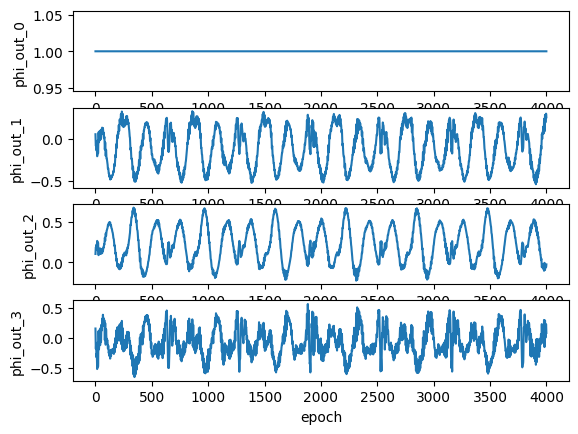

phi_out: tensor([[ 1.0000,  0.0606,  0.1034,  0.1539],
        [ 1.0000,  0.0136,  0.1284,  0.0338],
        [ 1.0000, -0.0514,  0.1686, -0.1225],
        ...,
        [ 1.0000,  0.2794, -0.0475,  0.1758],
        [ 1.0000,  0.2604, -0.0330,  0.1175],
        [ 1.0000,  0.2312, -0.0126,  0.0323]])
a = tensor([[-0.2386,  0.0480, -1.3720],
        [ 1.9239,  1.0120,  3.0544],
        [-0.4145, -0.6926,  6.6736],
        [-2.5032, -1.8324, -2.0657]])


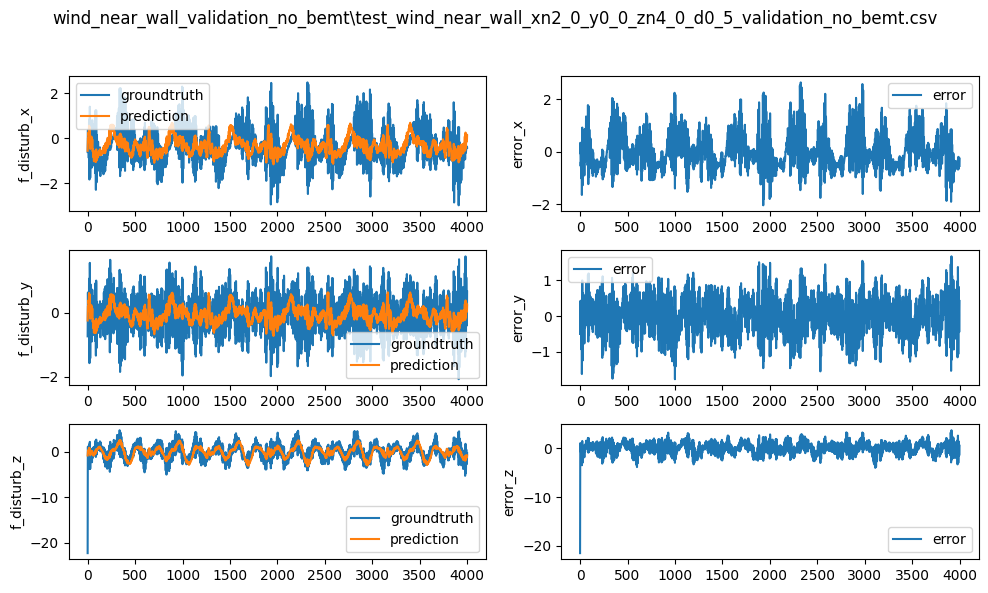

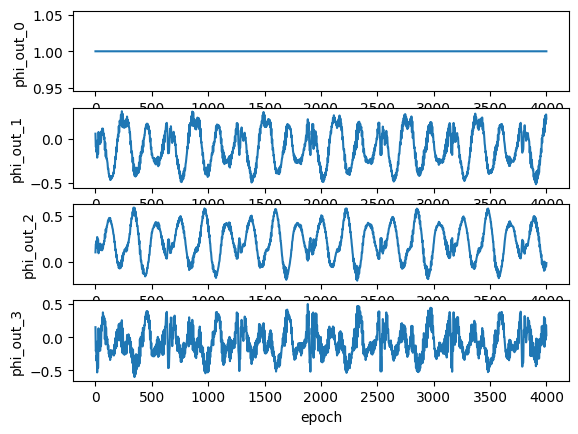

phi_out: tensor([[ 1.0000,  0.0621,  0.1046,  0.1573],
        [ 1.0000, -0.0035,  0.1413,  0.0026],
        [ 1.0000, -0.0891,  0.1977, -0.1859],
        ...,
        [ 1.0000,  0.1833, -0.0376,  0.2988],
        [ 1.0000,  0.1826, -0.0363,  0.2653],
        [ 1.0000,  0.1639, -0.0244,  0.1888]])
a = tensor([[-0.8330,  0.0121,  1.2654],
        [ 2.5434,  0.9126, -4.8453],
        [ 0.6508,  0.1790, 10.0714],
        [-1.4557, -0.5524,  2.6610]])


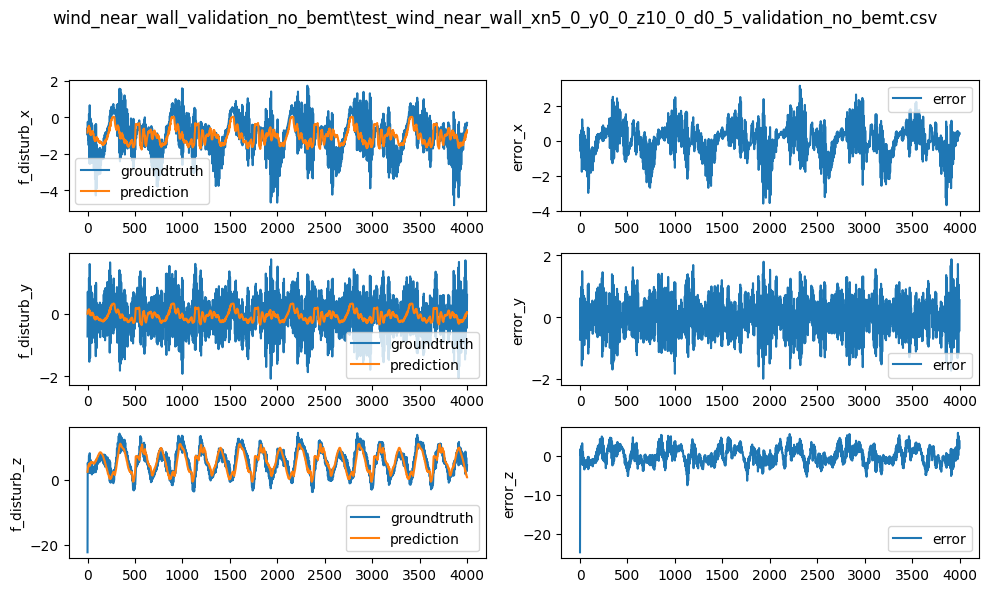

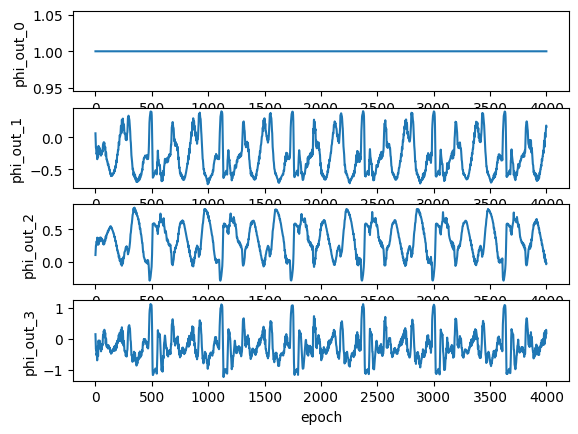

phi_out: tensor([[ 1.0000,  0.0637,  0.1021,  0.1615],
        [ 1.0000,  0.0080,  0.1320,  0.0217],
        [ 1.0000, -0.0693,  0.1809, -0.1590],
        ...,
        [ 1.0000,  0.2541, -0.0405,  0.1276],
        [ 1.0000,  0.2384, -0.0275,  0.0759],
        [ 1.0000,  0.2204, -0.0148,  0.0123]])
a = tensor([[-5.2706e-01, -8.4830e-03, -1.9181e+00],
        [ 2.8474e+00,  1.2581e+00,  6.3768e+00],
        [-2.8769e-01, -2.5789e-01,  1.4991e+01],
        [-2.8946e+00, -1.6080e+00, -1.2052e+00]])


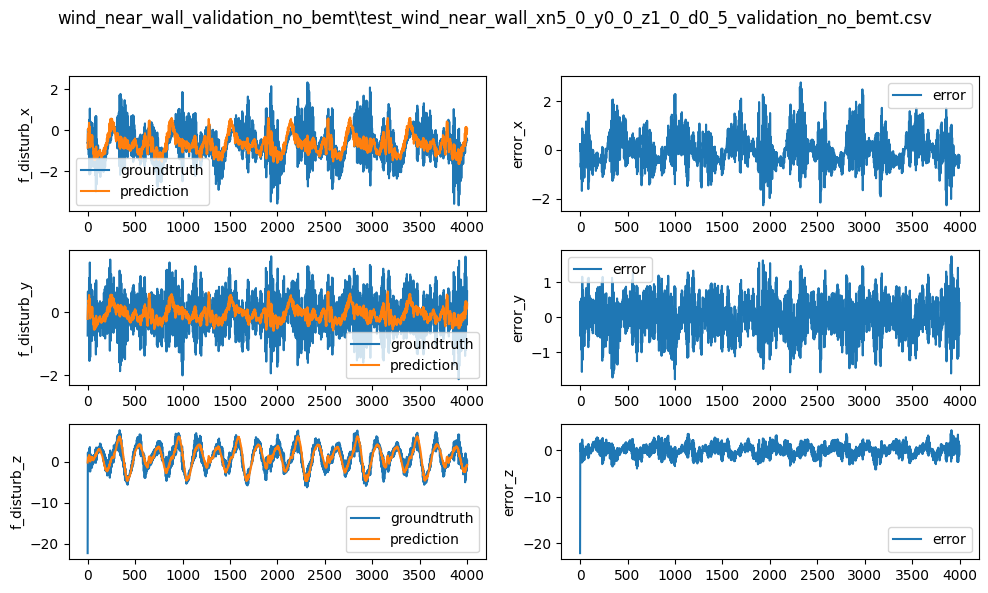

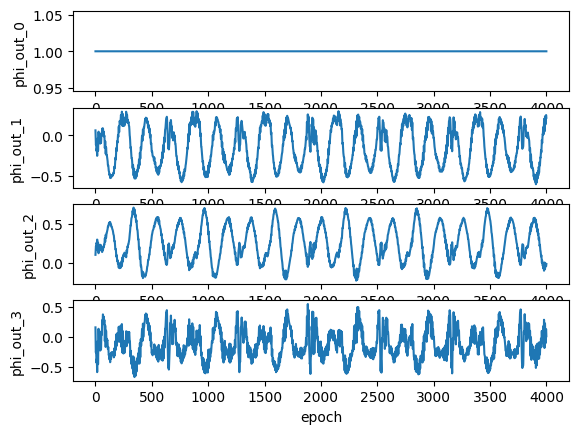

phi_out: tensor([[ 1.0000e+00,  5.9308e-02,  1.0554e-01,  1.5073e-01],
        [ 1.0000e+00,  3.9084e-04,  1.3747e-01,  6.9390e-03],
        [ 1.0000e+00, -7.9272e-02,  1.8915e-01, -1.7314e-01],
        ...,
        [ 1.0000e+00,  1.8631e-01, -1.2006e-02,  1.5370e-02],
        [ 1.0000e+00,  1.7369e-01, -5.1849e-05, -3.1843e-02],
        [ 1.0000e+00,  1.5999e-01,  1.0840e-02, -8.8610e-02]])
a = tensor([[-0.5370, -0.0255, -0.7663],
        [ 2.3139,  1.3273,  9.8325],
        [-0.4376,  0.0808, 19.0653],
        [-2.5290, -1.2793, -1.8005]])


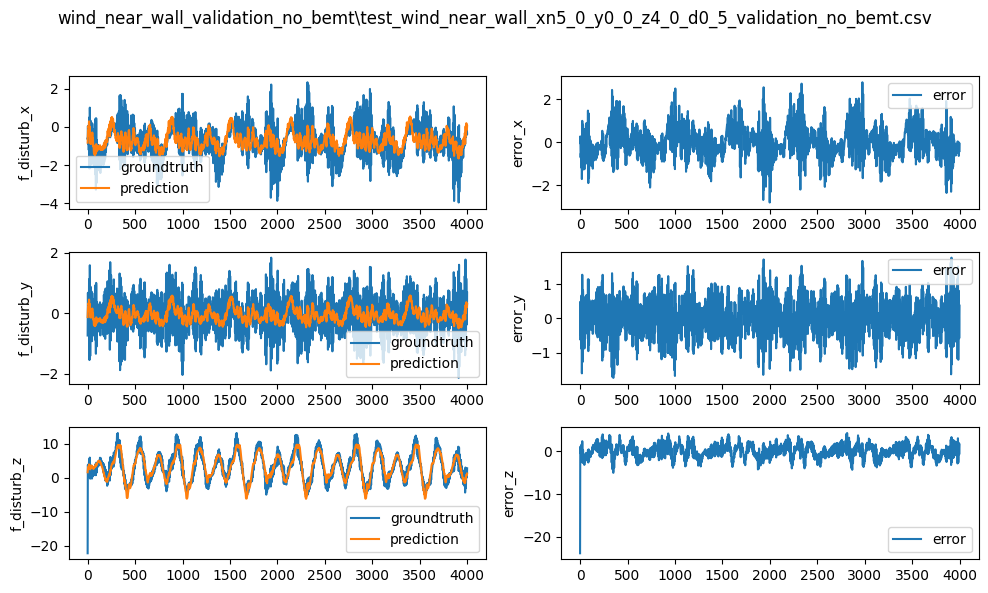

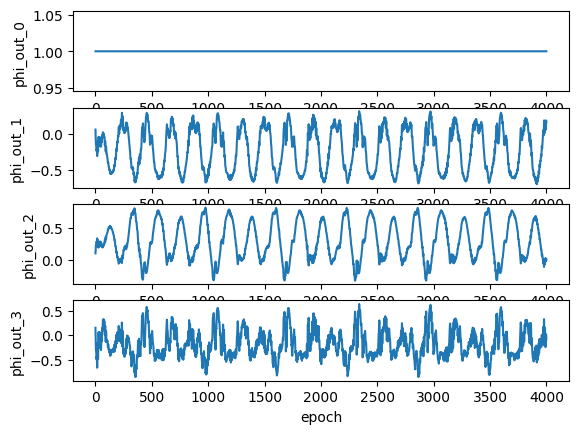

phi_out: tensor([[ 1.0000,  0.0633,  0.1047,  0.1602],
        [ 1.0000, -0.0124,  0.1478, -0.0150],
        [ 1.0000, -0.1088,  0.2122, -0.2236],
        ...,
        [ 1.0000,  0.1773, -0.0266,  0.0802],
        [ 1.0000,  0.1611, -0.0117,  0.0233],
        [ 1.0000,  0.1225,  0.0188, -0.0853]])
a = tensor([[-1.0985,  0.0815,  3.5365],
        [ 0.9490,  0.5596, -3.1156],
        [-0.3443, -1.1024,  2.0942],
        [-0.9433, -1.8217,  0.3469]])


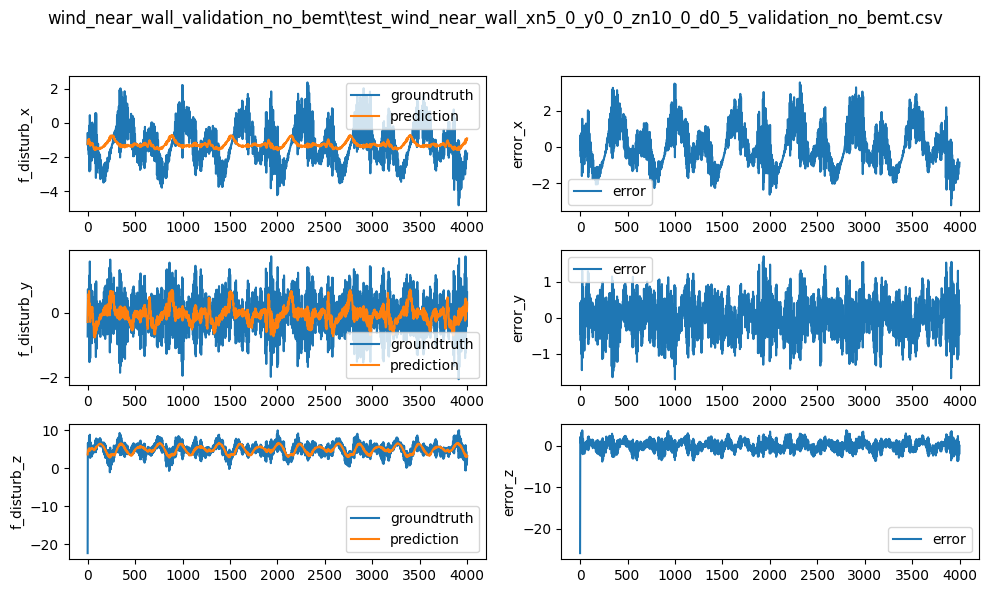

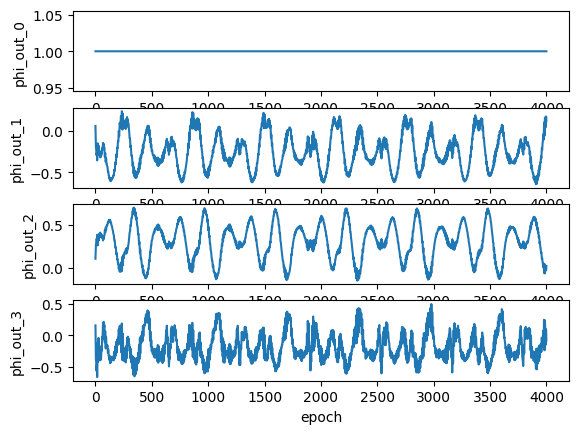

phi_out: tensor([[ 1.0000e+00,  6.0383e-02,  1.0353e-01,  1.5312e-01],
        [ 1.0000e+00,  1.2249e-02,  1.2782e-01,  2.7210e-02],
        [ 1.0000e+00, -6.2503e-02,  1.7442e-01, -1.5200e-01],
        ...,
        [ 1.0000e+00,  2.5719e-01, -3.6926e-02,  1.2989e-01],
        [ 1.0000e+00,  2.3955e-01, -2.2826e-02,  7.5640e-02],
        [ 1.0000e+00,  2.1614e-01, -6.1781e-03, -2.7103e-04]])
a = tensor([[-0.5861, -0.0142, -2.3473],
        [ 2.5391,  1.1332,  5.9568],
        [-0.3475, -0.3801, 13.1297],
        [-2.7065, -1.6444, -1.5109]])


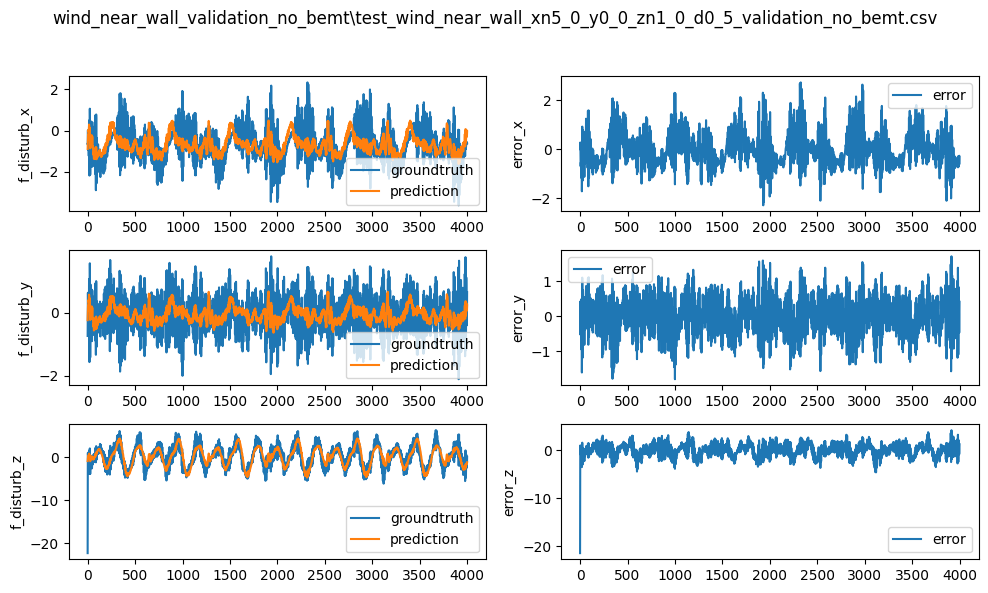

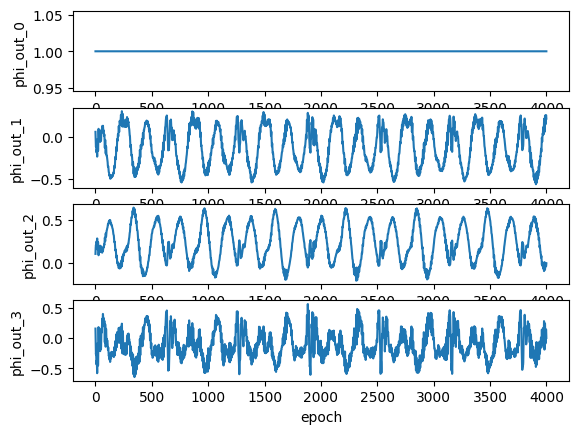

phi_out: tensor([[ 1.0000,  0.0599,  0.1040,  0.1516],
        [ 1.0000,  0.0065,  0.1303,  0.0106],
        [ 1.0000, -0.0756,  0.1823, -0.1838],
        ...,
        [ 1.0000,  0.2629, -0.0390,  0.1422],
        [ 1.0000,  0.2435, -0.0242,  0.0840],
        [ 1.0000,  0.2058,  0.0034, -0.0196]])
a = tensor([[-0.7098,  0.0273, -1.3603],
        [ 2.1079,  0.9687,  2.5710],
        [-0.8257, -0.7517,  7.0345],
        [-2.7617, -1.8620, -1.4357]])


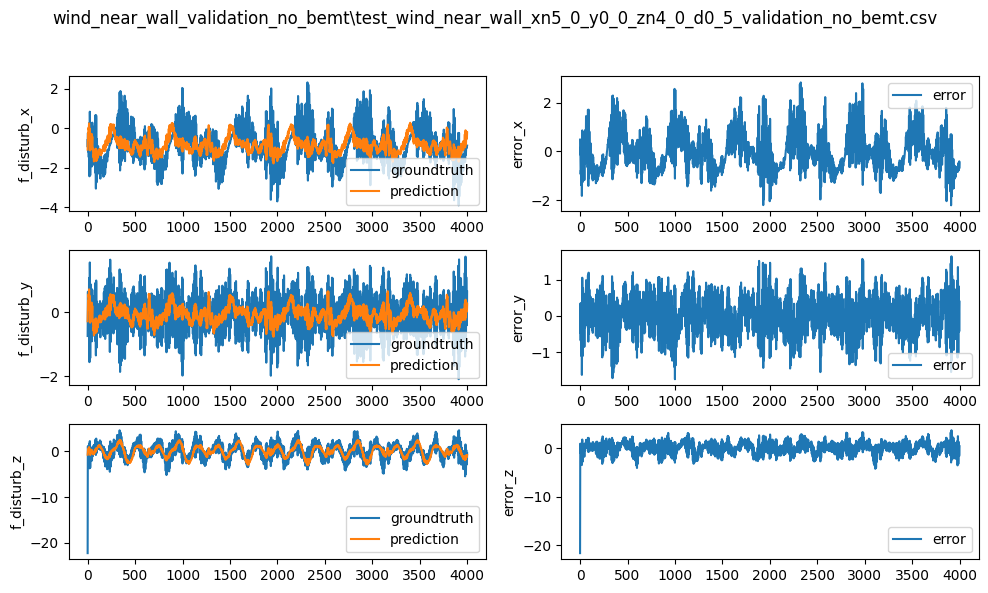

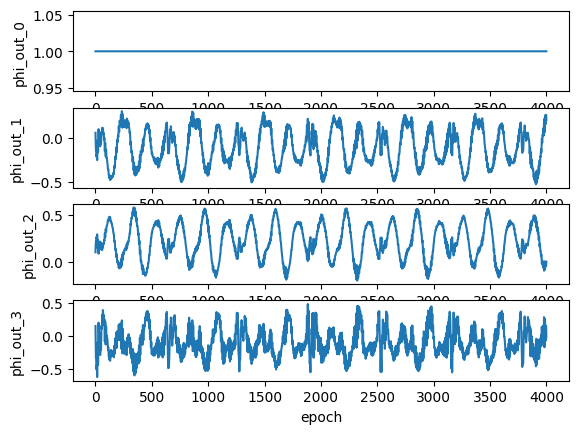

average rms for dim 0: 0.7076811997954162
average rms for dim 1: 0.5155372373468854
average rms for dim 2: 1.4300063408584434


c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\learning\validator.py:157: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


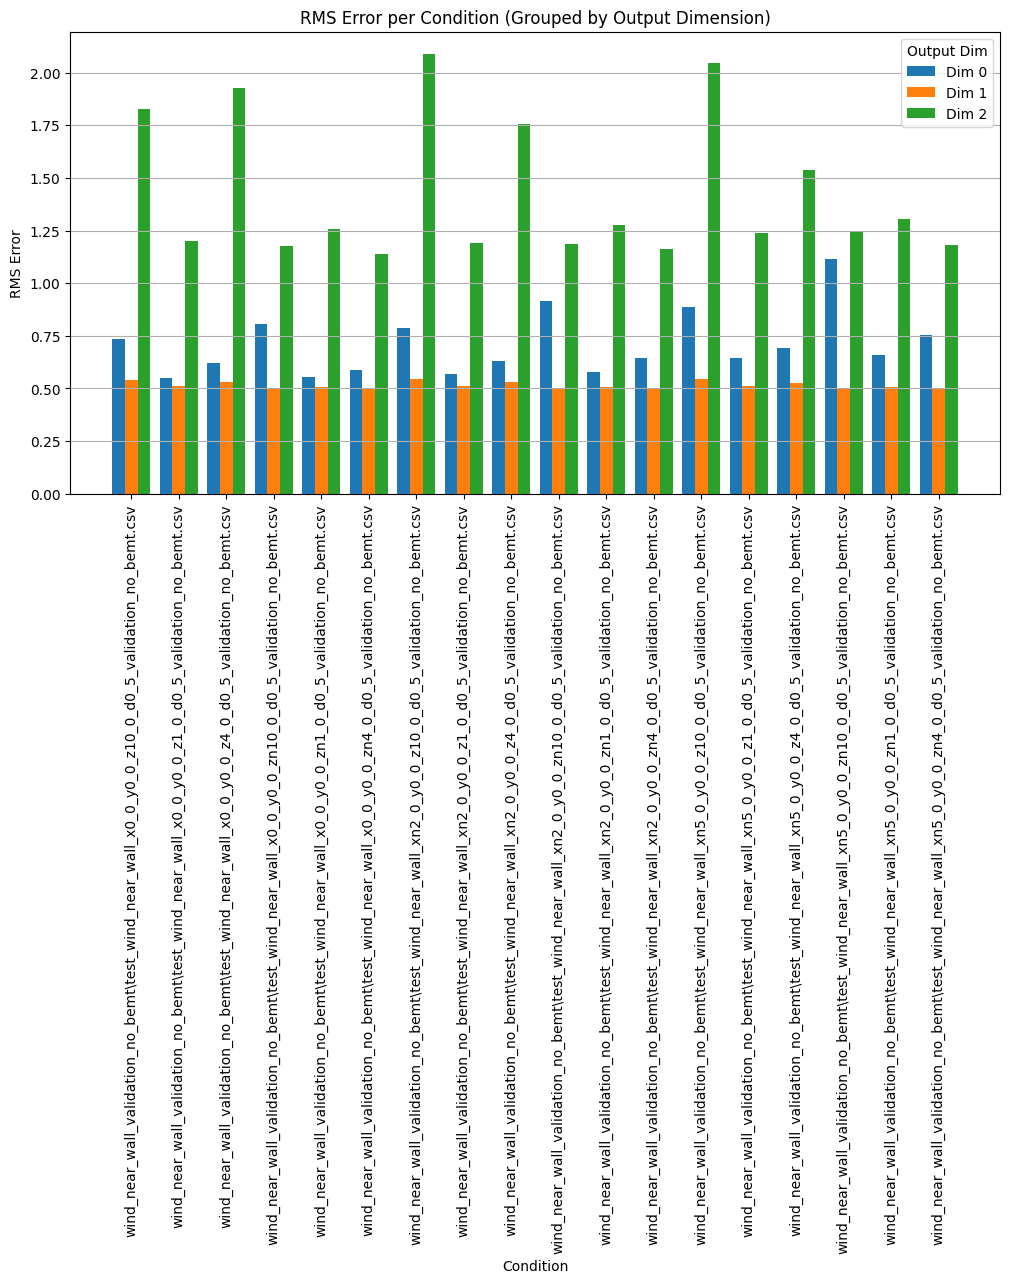

average mse for dim 0: 0.5220164422585238
average mse for dim 1: 0.26604320732613124
average mse for dim 2: 2.152409332207314


c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\learning\validator.py:196: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


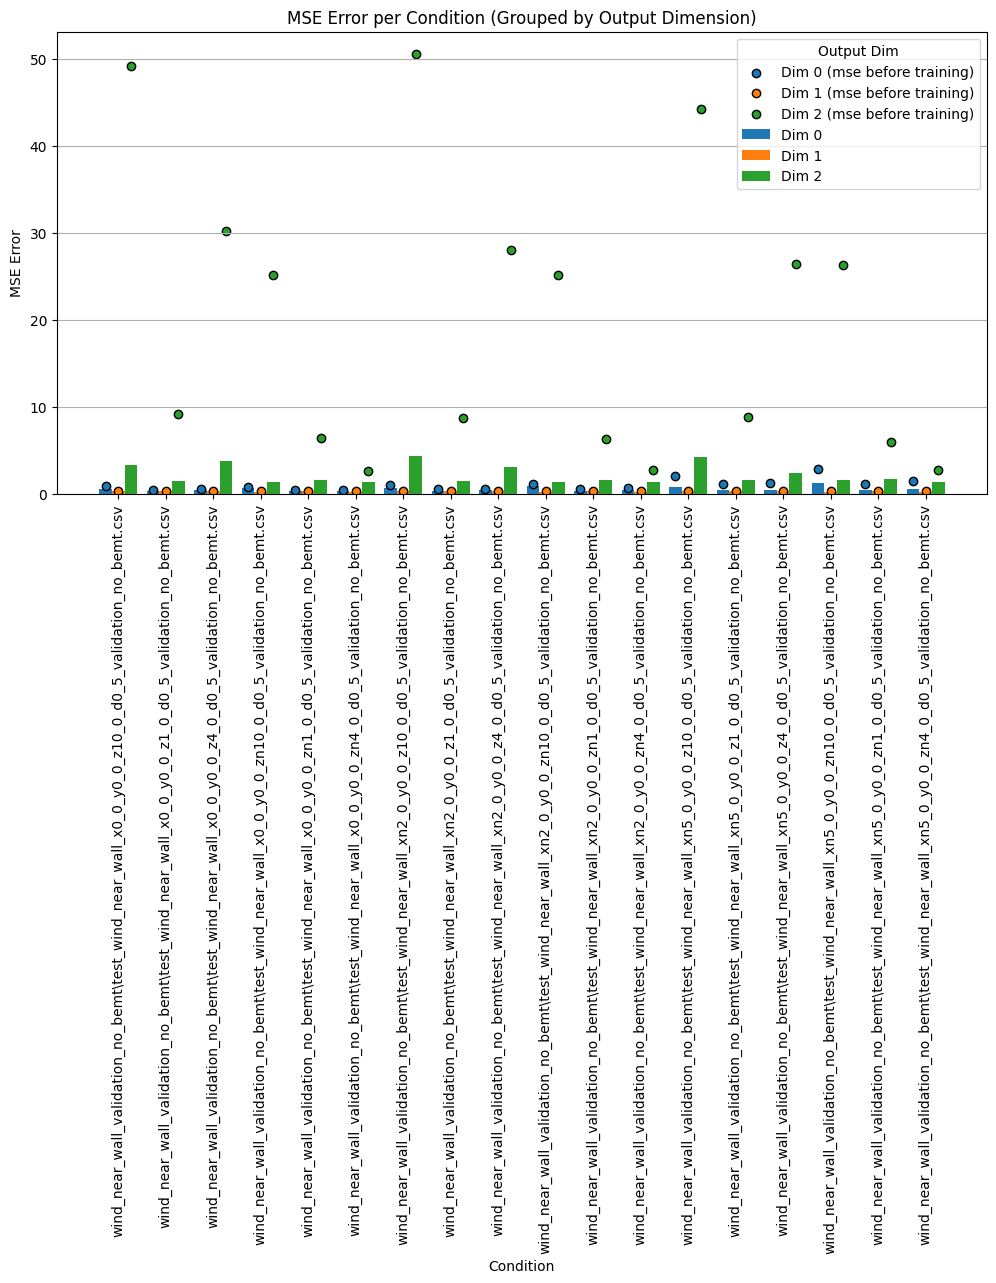

In [5]:
%matplotlib inline
model_name = training_subfolder

subfolder = validation_subfolder
subfolder = "wind_near_wall_validation_no_bemt"
# subfolder = "nf_validation_back2back"
data_list = generate_data_list(subfolder)
print("test Data List:")
for data in data_list:
    print(data)

# debug
# data_list = data_list[:1]  # use small data list for quick testing

manager = factory.make_test_pipeline()

manager.set_up(
    data_menu=data_list,
    input_label_map_file=path1,
    model_name=model_name
)

# make a new trainer to replicate the above setup, just to allow verify_model to work
manager.test()
plt.show()  
